## Описание данных

<b> Цель проекта:</b> выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

<b>Исходные данные:</b> данные, полученных из API HH.ru

<b>План исследования:</b>
* Предобработка данных.
* Исследовательский анализ данных
* Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.
* Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.
* Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей по числу вакансий, зарплата, тип занятости, график работы отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
* Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
* Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный cаналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
* Расчет помесячной динамики количества вакансий для Аналитика данных и Системного аналитика отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
* Формулирование выводов и рекомендаций.

<b>Описание данных:</b>

Данные получены из двух таблиц:
* vacancies_da(1).xlsx - вакансии Аналитика данных.
* vacancies_sa.xlsx - вакансии Системного аналитика. 

Перчень столбцов в обеих таблицах идентичны:
* id - Уникальный идентификатор вакансии.
* name - Название вакансии.
* published_at - Дата публикации.
* alternate_url - Ссылка на вакансию.
* type - Статус вакансии на момент получения данных от api и передачи их в базу.
* employer - Работодатель.
* department - Работодатель, отдел.
* area - Регион места работы.
* experience - Требуемый опыт работы.
* key_skills - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
* schedule - График работы.
* employment - Тип занятости.
* description - Описание вакансии.
* description_lemmatized - Лемматизированное описание вакансии.
* salary_from - Нижняя граница предлагаемой заработной платы.
* salary_to - Верхняя граница предлагаемой заработной платы.
* salary_bin - Категория зарплаты.
* key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.
* hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. * * * * soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

## Предобработка данных

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [124]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', 2000)

In [35]:
da = pd.read_excel('vacancies_da (1).xlsx')
sa = pd.read_excel('vacancies_sa.xlsx')

In [36]:
da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [37]:
sa.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


Для удобства предобработки данных и запонения пропущенных значений объединим обе таблицы в один датасет.

Для идентификации данных по видам вакансий добавим в признак вида вакансии vacancy_type с значением da для вакансий Аналитик данных и sa для вакансий Системного аналитика.

In [38]:
da['vacancy_type'] = 'da'

In [39]:
sa['vacancy_type'] = 'sa'

In [40]:
# Объеденим таблицы
all_vacancies = pd.concat([da, sa])     

In [41]:
all_vacancies.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancy_type
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,da
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,da
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,da
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",...,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,da
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],...,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN,da
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",...,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",da
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],...,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.0,NaN,ЗП не указана,NaN,NaN,NaN,da
9,100071014,Аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],...,Полная занятость,пао «россети урал» — крупнейшая электросетевая...,россеть урал крупный электросетевой компания у...,51000.0,NaN,ЗП не указана,NaN,NaN,Аналитическое мышле

In [42]:
all_vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 1914
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null   obj

Типы данных соответствуют представленным данным. Изменение типа данных не требуется.

## Исследовательский анализ данных

In [43]:
# Проверим таблицу на явные дубликаты
all_vacancies.duplicated().sum()

np.int64(0)

In [44]:
# Посмотрим количество уникальных названий вакансий
all_vacancies['name'].nunique()

1574

In [85]:
# Посмотрим ТОП 20 уникальных названий вакансий
all_vacancies['name'].value_counts().head(20)

name
Системный аналитик                     568
Аналитик данных                        463
Data Analyst                            84
Системный аналитик 1С                   62
Ведущий системный аналитик              50
Ведущий аналитик данных                 30
Системный аналитик DWH                  25
Data analyst                            25
Старший системный аналитик              24
Старший аналитик данных                 23
System analyst                          22
Младший аналитик данных                 20
System Analyst                          14
System Analyst / Системный аналитик     14
Аналитик данных IVR                     14
Senior Data Analyst                     14
Data analyst / Аналитик данных          12
Аналитик данных / Data Analyst          11
Junior Data Analyst                     10
Аналитик данных / Аналитик DWH           9
Name: count, dtype: int64

In [45]:
# Удалим лишние пробелы в начале и конце названия и приведем к нижнему регистру
all_vacancies['name'].str.lower().str.strip().nunique()

1479

In [46]:
# Посмотрим количество уникальных названий работодателей
all_vacancies['employer'].nunique()

1358

In [47]:
# Удалим лишние пробелы в начале и конце названия и приведем к нижнему регистру
all_vacancies['employer'].str.lower().str.strip().nunique()

1358

In [48]:
# Посмотрим ТОП 20 работодаелей по количеству опубликованных вакансий
all_vacancies['employer'].value_counts().head(20)

employer
СБЕР                                     338
Т1                                       106
Aston                                     66
WILDBERRIES                               51
ПСБ (ПАО «Промсвязьбанк»)                 40
Ozon                                      40
Совкомбанк Технологии                     37
МТС                                       36
Банк ВТБ (ПАО)                            33
МАГНИТ, Розничная сеть                    27
билайн                                    26
Центральный банк Российской Федерации     26
Selecty                                   24
Okko                                      23
Т-Банк                                    22
IBS                                       19
Яндекс                                    18
Правительство Москвы                      18
Ростелеком Информационные Технологии      18
Красное & Белое, розничная сеть           18
Name: count, dtype: int64

In [49]:
# Посмотрим количество уникальных названий городов
all_vacancies['area'].nunique()     

106

In [50]:
# Посмотрим ТОП 20 городов по количеству опубликованных вакансий
all_vacancies['area'].value_counts().head(20)

area
Москва             2381
Санкт-Петербург     404
Екатеринбург        111
Новосибирск          82
Казань               80
Нижний Новгород      66
Краснодар            51
Владивосток          42
Самара               40
Ростов-на-Дону       34
Воронеж              31
Пермь                29
Тюмень               25
Челябинск            24
Томск                20
Красноярск           16
Саратов              15
Уфа                  14
Калининград          12
Тверь                10
Name: count, dtype: int64

In [51]:
# Удалим лишние пробелы в начале и конце названия и приведем к нижнему регистру
all_vacancies['area'].str.lower().str.strip().nunique()

106

In [52]:
# Посмотрим количество уникальных категорий по опыту работы
all_vacancies['experience'].value_counts()     

experience
Junior+ (1-3 years)      1943
Middle (3-6 years)       1488
Junior (no experince)     228
Senior (6+ years)          57
Name: count, dtype: int64

In [53]:
# Посмотрим количество уникальных твердых навыков
all_vacancies['hard_skills_from_description'].nunique()    

9

In [54]:
# Удалим лишние пробелы в начале и конце названия и приведем к нижнему регистру
all_vacancies['hard_skills_from_description'].str.lower().str.strip().nunique()

9

In [87]:
# Посмотрим топ твердых навыков
all_vacancies['hard_skills_from_description'].value_counts()

hard_skills_from_description
confluence                    636
Pandas                        266
Юнит-экономика                 39
Pandas, confluence             30
confluence, Юнит-экономика      9
Pandas, Юнит-экономика          4
Google Sheets                   2
Pandas, Google Sheets           1
Математическая статистика       1
Name: count, dtype: int64

In [89]:
# Посмотрим количество уникальных мягких навыков
all_vacancies['soft_skills_from_description'].nunique()

46

In [90]:
# Удалим лишние пробелы в начале и конце названия и приведем к нижнему регистру
all_vacancies['soft_skills_from_description'].str.lower().str.strip().nunique()

46

In [93]:
# Посмотрим топ мягких навыков
all_vacancies['soft_skills_from_description'].value_counts().head(20)

soft_skills_from_description
Документация                                          1168
Коммуникация, Документация                             213
Коммуникация                                           175
Аналитическое мышление                                 148
Документация, Аналитическое мышление                    89
Проактивность                                           33
Документация, Проактивность                             29
Документация, Переговоры                                22
Проактивность, Аналитическое мышление                   15
Коммуникация, Документация, Аналитическое мышление      15
Коммуникация, Аналитическое мышление                    10
Коммуникация, Проактивность                             10
Коммуникация, Переговоры                                 8
Переговоры                                               8
Коммуникация, Документация, Проактивность                6
Креативность, Аналитическое мышление                     6
Коммуникация, Документация,

### Определим доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик

In [82]:
# Подготовим данные
da_df = all_vacancies.loc[all_vacancies['vacancy_type']== 'da']['experience'].value_counts().sort_index()
sa_df = all_vacancies.loc[all_vacancies['vacancy_type']== 'sa']['experience'].value_counts().sort_index()

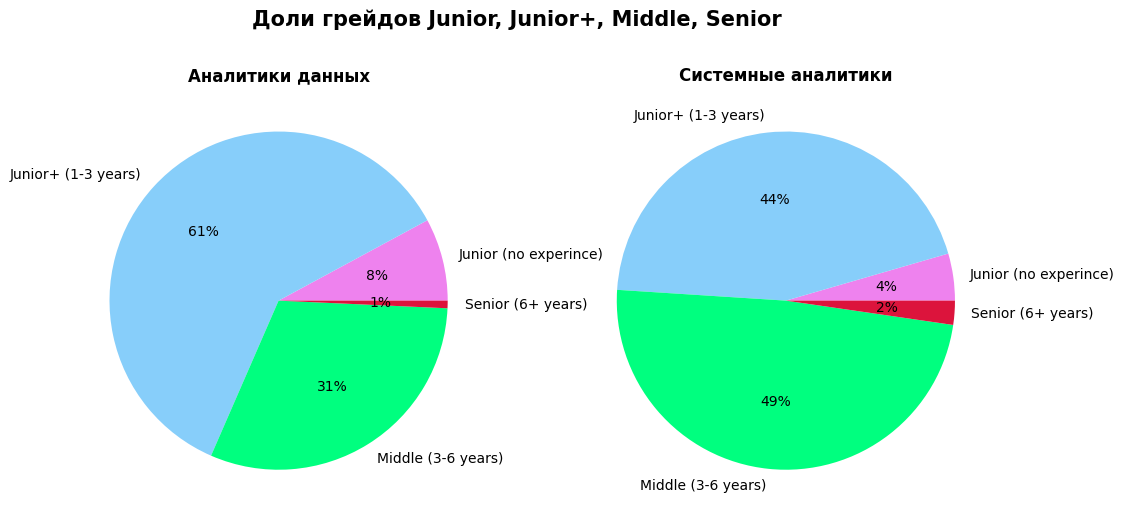

In [83]:
# Сформируем поле для диаграмм
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Создадим круговую диаграмму для Аналитиков данных
ax[0].pie(da_df,
          labels= [lbl for lbl, value in da_df.items()],
          autopct='%1.f%%',
          textprops={'fontsize': 10},
          colors = ['#EE82EE', '#87CEFA', '#00FF7F', '#DC143C'])
ax[0].set_title('Аналитики данных', fontsize=12, fontweight='bold')

# Создадим круговую диаграмму для Системных аналитиков
ax[1].pie(sa_df,
       labels= [lbl for lbl, value in sa_df.items()],
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors = ['#EE82EE', '#87CEFA', '#00FF7F', '#DC143C']  )
ax[1].set_title('Системные аналитики', fontsize=12, fontweight='bold')

plt.suptitle('Доли грейдов Junior, Junior+, Middle, Senior', fontsize=15, fontweight='bold')
plt.show()

На должность Аналитика данных предпочитают нанимать специалистов уровня Junior+ с опытом от 1 до 3 лет (61%)
<br>На должность Системного аналитика предпочитают нанимать специалистов уровня Middle с опытом от 3 до 6 лет (49%)
<br>На должность Аналитика данных больше предложений для специалистов без опыта Junior (8% от вакансий), чем для Системного аналитика (таких вакансий всего 4%).
<br>Меньше всего вакансий для специалистов уровня Senior (более 6 лет опыта). Для Аналитика данных таких вакансий всего 1%, для Систменого аналитика - 2%.

### Определим типичные места работы для Аналитика данных и Системного аналитика 

Отдельно для грейдов Junior, Junior+, Middle, Senior по следующим параметрам:
* ТОП-работодателей
* зарплата
* тип занятости
* график работы

#### ТОП-работодателей

In [65]:
def prepare_data(data,columns,parameter):
    result = data[columns].reset_index(drop=True)
# Преобразуем перечень скилов в список и выведем каждый скил в отдельную строку
    result[parameter]=result[parameter].str.split(',')
    result=result.explode(parameter)
    result[parameter]= result[parameter].str.lstrip()
    return result

In [97]:
def parameter_for_grade(df, parameter, title_):

    fig, ax = plt.subplots(2, 4, figsize=(30, 10))

    plt.suptitle(title_ + ' для Junior, Junior+, Middle, Senior', fontsize=22, fontweight='bold')

    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']
    for i, experience in enumerate(experience):
        da_1=df.query("vacancy_type == 'da' and experience == @experience").groupby([parameter, 'experience'], as_index = False)['id'].count().sort_values(by='id', ascending=False).head(10)
        sa_1=df.query("vacancy_type == 'sa' and experience == @experience").groupby([parameter, 'experience'], as_index = False)['id'].count().sort_values(by='id', ascending=False).head(10)
        # График для аналитиков данных
        sns.barplot(x='id', y=parameter, data=da_1,ax=ax[0, i], color='#8A2BE2')
        ax[0, i].set_title(f"Аналитики {experience}", fontsize=15)
        ax[0, i].set_xlabel('')
        ax[0, i].set_ylabel('')
    # График для Системных аналитиков
        sns.barplot(x='id', y=parameter, data=sa_1, ax=ax[1, i], color='#00BFFF')
        ax[1, i].set_title(f"Системные аналитики {experience}", fontsize=15)
        ax[1, i].set_xlabel('')
        ax[1, i].set_ylabel('')
    plt.subplots_adjust(wspace = 1)
    plt.show()

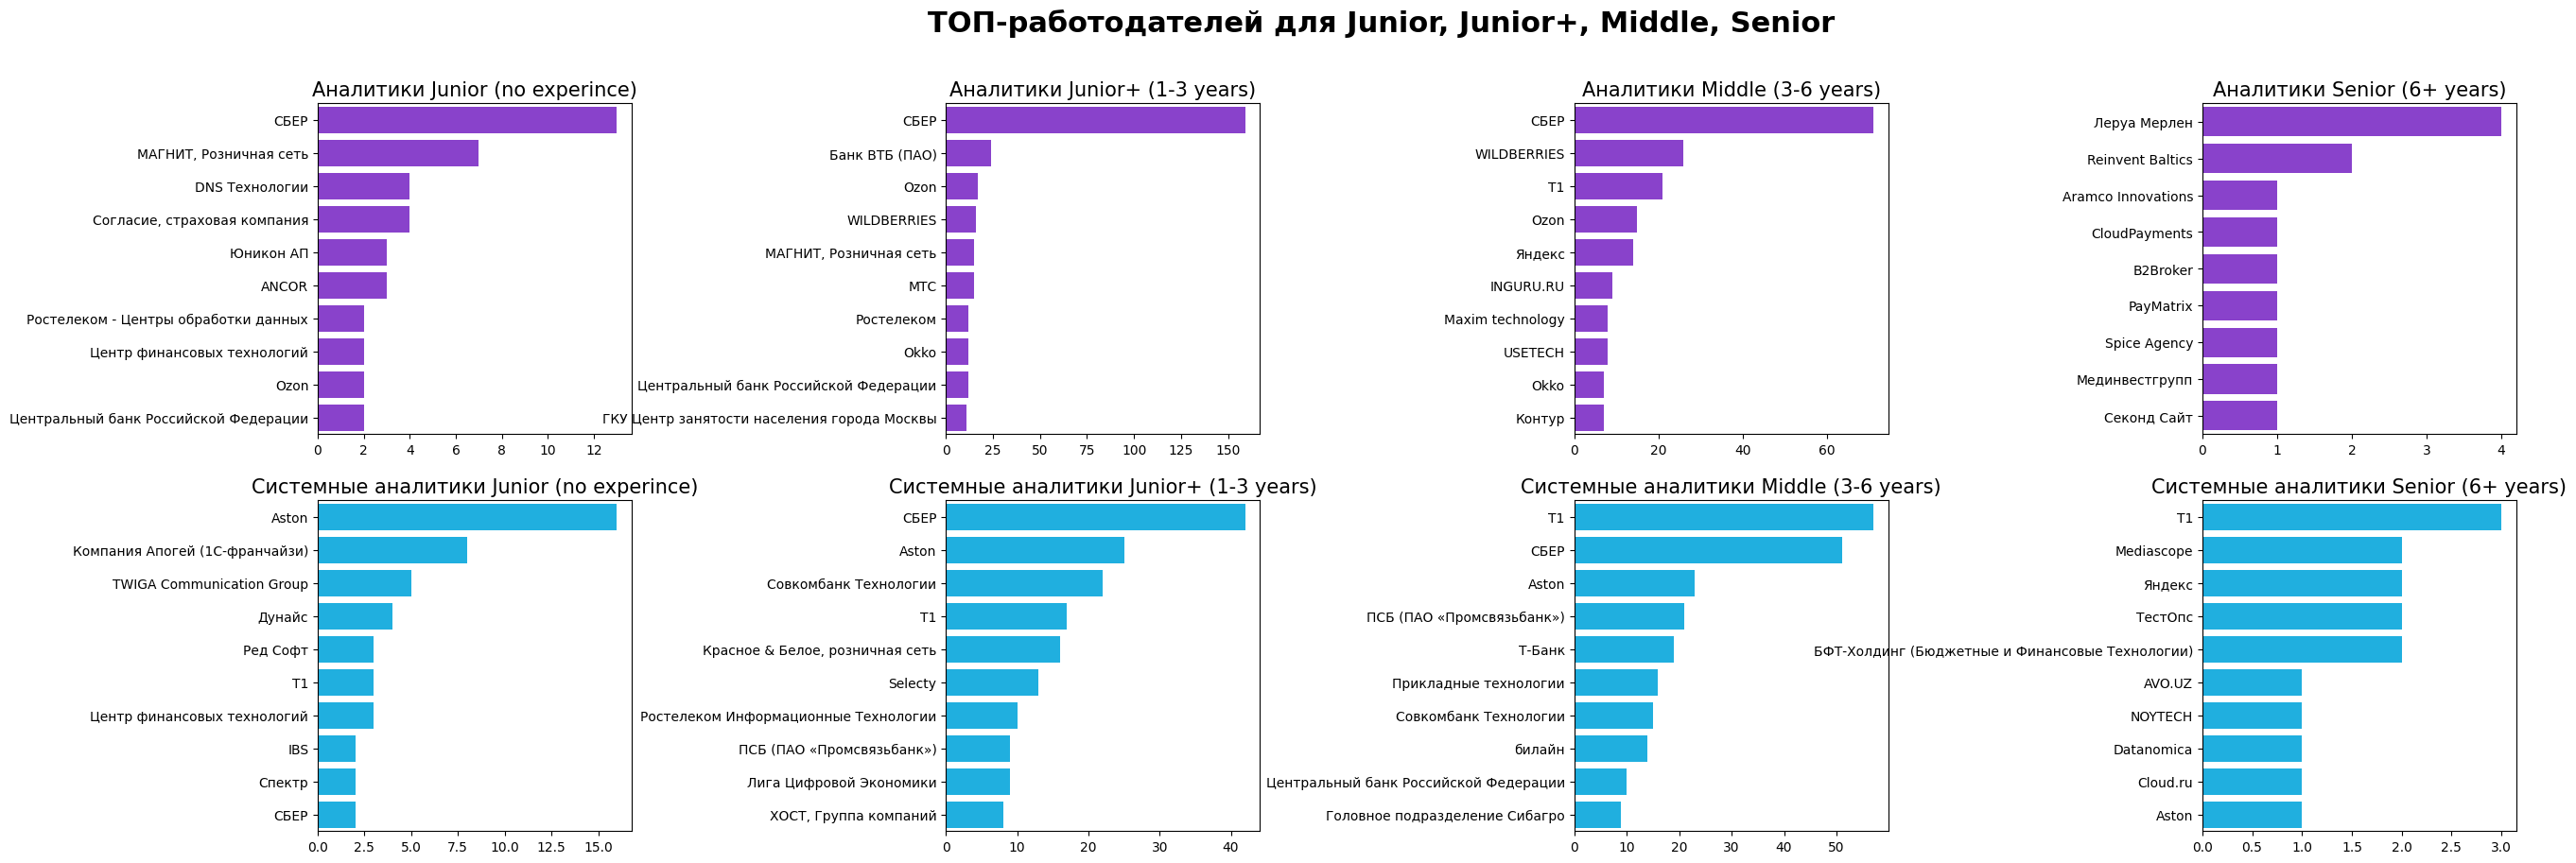

In [98]:
parameter_for_grade(all_vacancies, 'employer', 'ТОП-работодателей')

Среди вакансий для Аналитиков данных и Системных аналитиков лидирует Сбер.

Больше всего вакансий для Аналитиков данных предлагают компании:
* Для специалистов Junior без опыта работы - Сбер, Магнит, DNS.
* Для специалистов Junior + с опытом 1-3 года - Сбер, ВТБ, Озон.
* Для специалистов Middle с опытом 3-6 года - Сбер, Wildberries, Т1.
* Для специалистов Senior с опытом более 6 лет - Леруа Мерлен, Reinvent Baltics, Aramco Innovations.

Больше всего вакансий для Системных аналитиков предлагают компании:
* Для специалистов Junior без опыта работы - Aston, Компания Апогей, Twiga.
* Для специалистов Junior + с опытом 1-3 года - Сбер, Aston, Совком Технологии.
* Для специалистов Middle с опытом 3-6 года - Сбер, Wildberries, Т1.
* Для специалистов Senior с опытом более 6 лет - Т1, Сбер, Aston.

#### Уровень зарплат

In [107]:
# Создадим функцию которая изменит значения в столбце зарплаты salary_bin, если утсановлено значение "ЗП не указана" значениями из столбца нижней шраницы зарплаты salary_from, если оно заполнено
def salary_category(row: pd.Series):
  if row['salary_bin'] == 'ЗП не указана':
    if row.isna()['salary_from']:
      return 'ЗП не указана'
    elif row['salary_from'] < 100000:
      return 'Меньше 100 тысяч'
    elif row['salary_from'] >= 100000 and row['salary_from'] < 200000:
      return 'От 100 тысяч до 200 тысяч'
    elif row['salary_from'] >= 200000 and row['salary_from'] < 300000:
      return 'От 200 тысяч до 300 тысяч'
    else:
      return 'Больше 300 тысяч'
  else:
    return row['salary_bin']
     
# Обновим значения в столбце `salary_bin`
all_vacancies['salary_bin'] = all_vacancies.apply(salary_category, axis=1)  


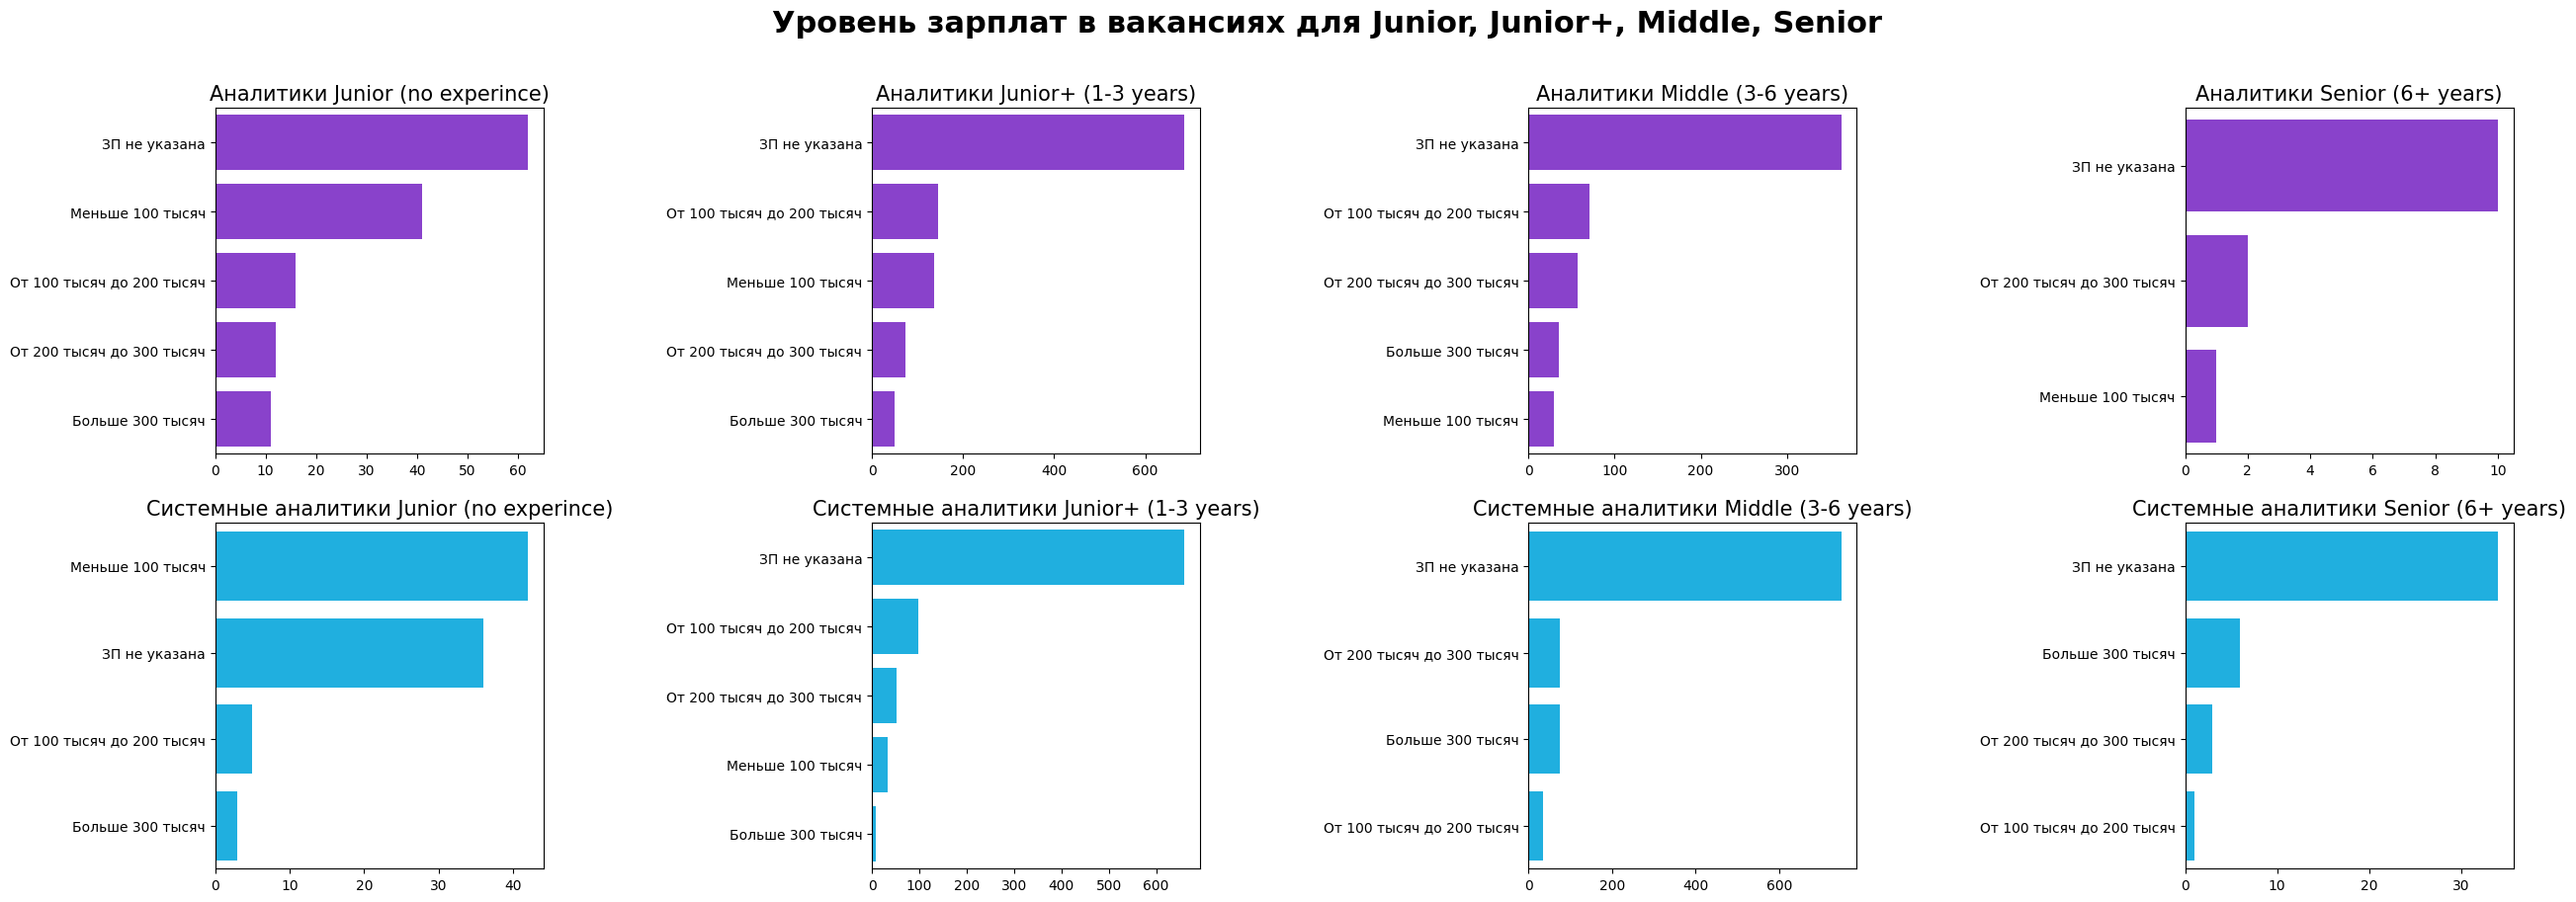

In [108]:
parameter_for_grade(all_vacancies, 'salary_bin', 'Уровень зарплат в вакансиях')

Анализ уровня зарплат в вакансиях показывает, что:
* Аналитикам данных и Системным аналитикам Junior без опыта работы, в основном, предлагают меньше 100 тыс.
* Аналитикам данных Junior+ с опытом 1- 3 года, в основном, предлагают от 100 до 200 тыс. и меньше 100 тыс.
* Системным аналитикам Junior+ с опытом 1- 3 года, в основном, предлагают от 100 до 200 тыс.
* Аналитикам данных уровня Middle, в основном, предлагают от 100 до 200 тыс.
* Системным аналитикам уровня Middle, в основном, предлагают от 200 до 300 тыс. и больше 300 тыс.
* Аналитикам данных уровня Senior, в основном, предлагают от 200 до 300 тыс.
* Системным аналитикам уровня Senior, в основном, предлагают больше 300 тыс.

#### Тип занятости

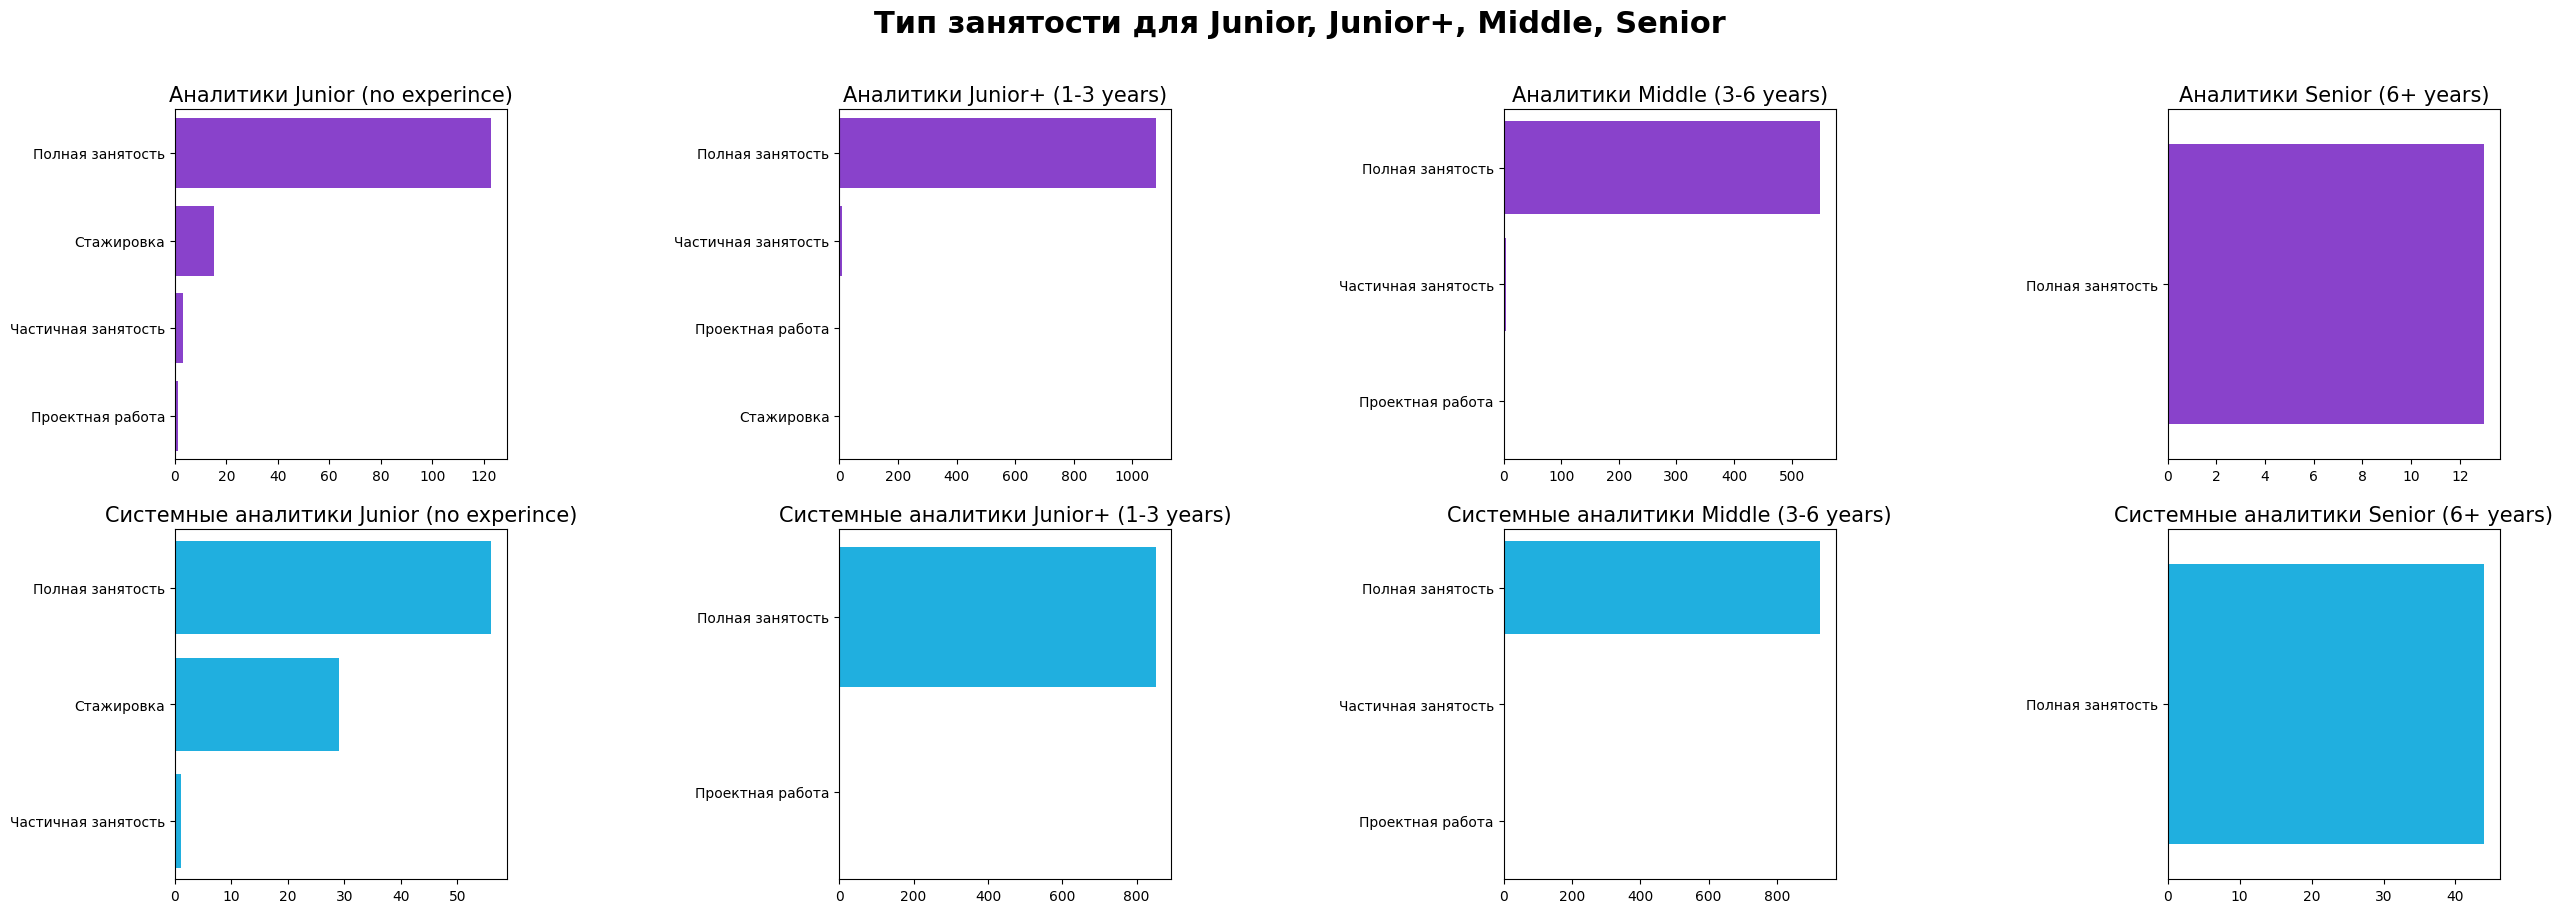

In [109]:
parameter_for_grade(all_vacancies, 'employment', 'Тип занятости')

Анализ типа занятости показывает, что специалистов всех грейдов работодатели предпочитают нанимать на полный день. Для специалистов без опыта работы также встречаются стажировки.

#### График работы

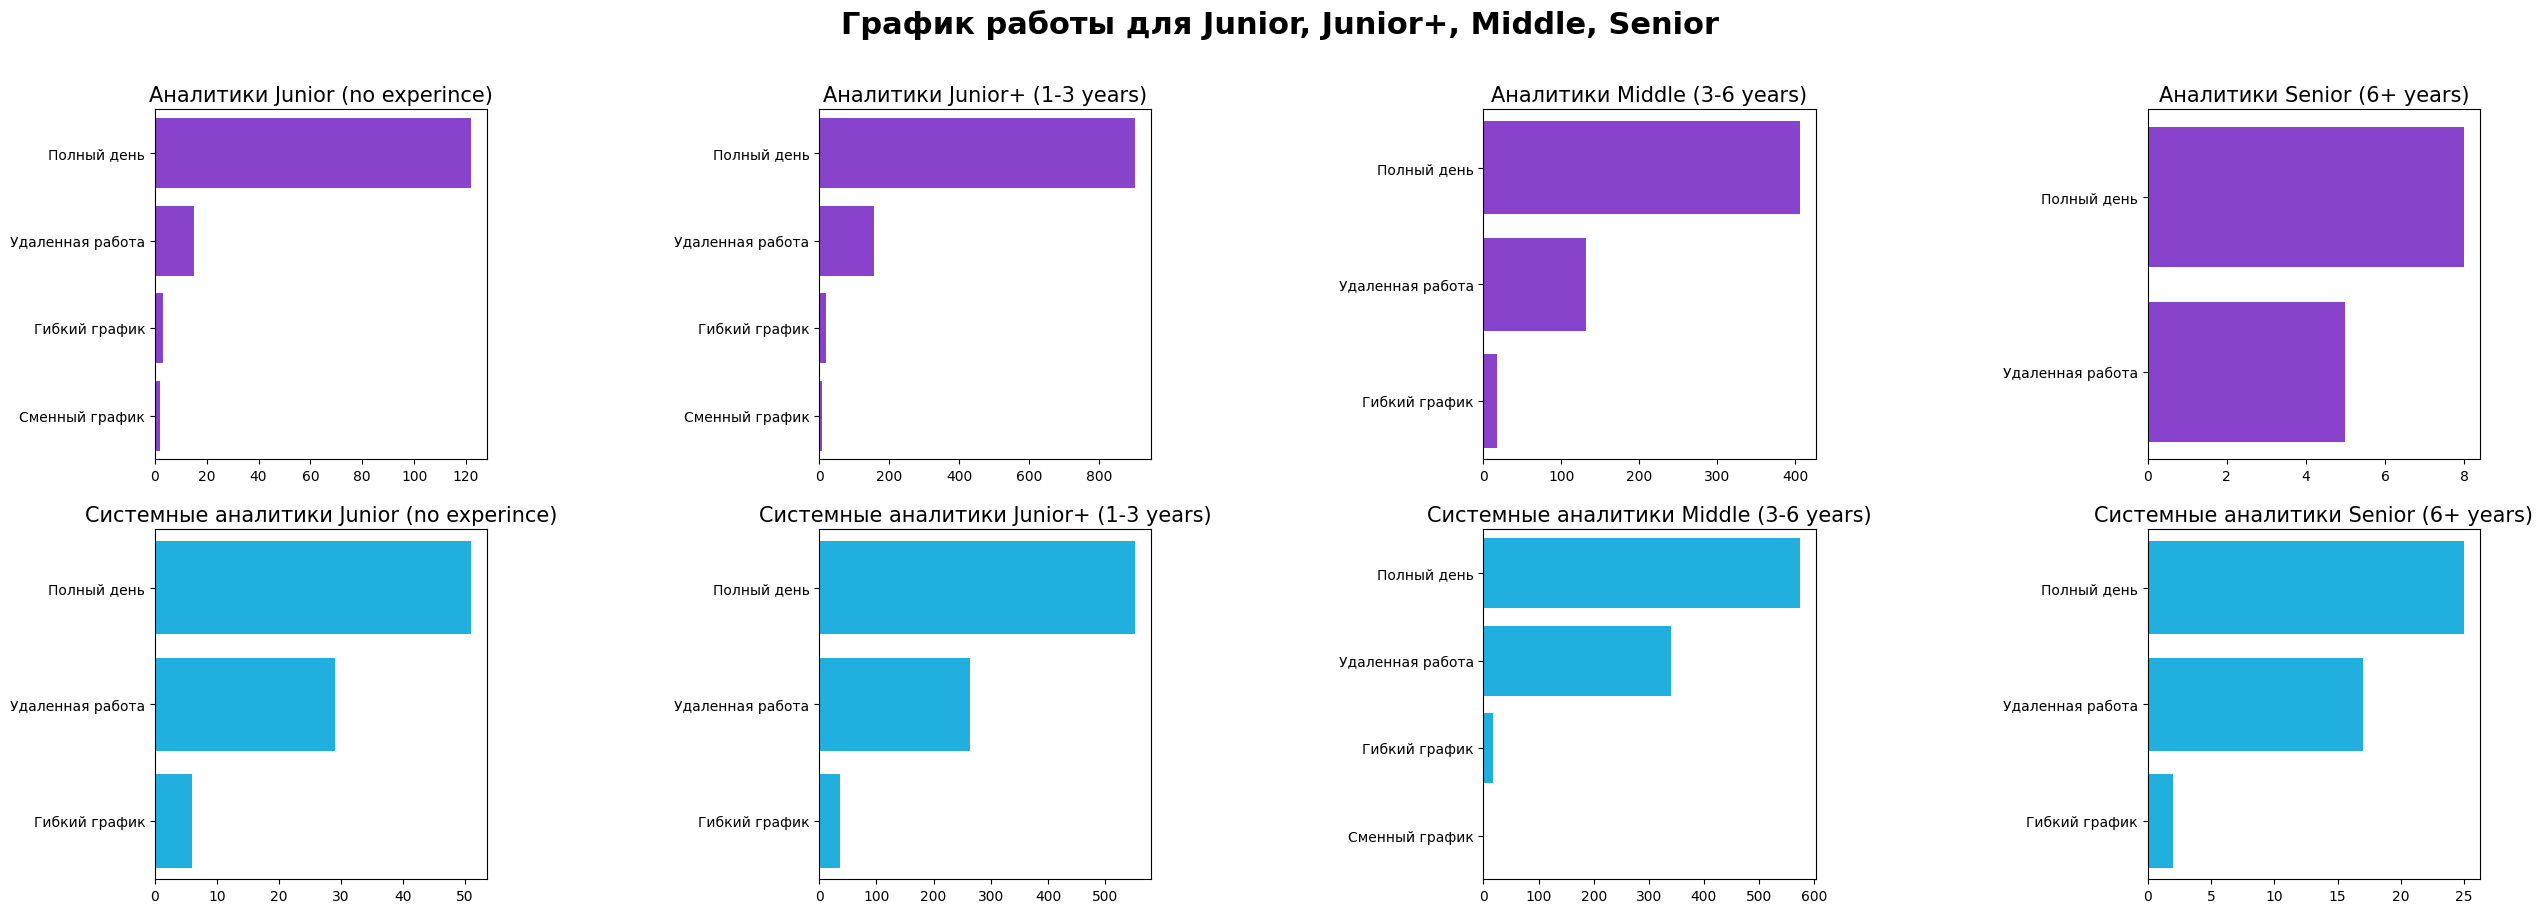

In [110]:
parameter_for_grade(all_vacancies, 'schedule', 'График работы')

Анализ графика работы показывает, что, в основном, работодатели хотят нанимать специалистов на полный день. С увеличением опыта спеициалистов увеличивается количество предложений с удаленной работы. Предложения работы с гибким и сменным графиком представлены в минимальном количестве.   

### Определим какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

In [111]:
df_all_skills=prepare_data(all_vacancies,['id','vacancy_type','experience','key_skills'],'key_skills')
df_all_skills=df_all_skills[df_all_skills.key_skills!='']

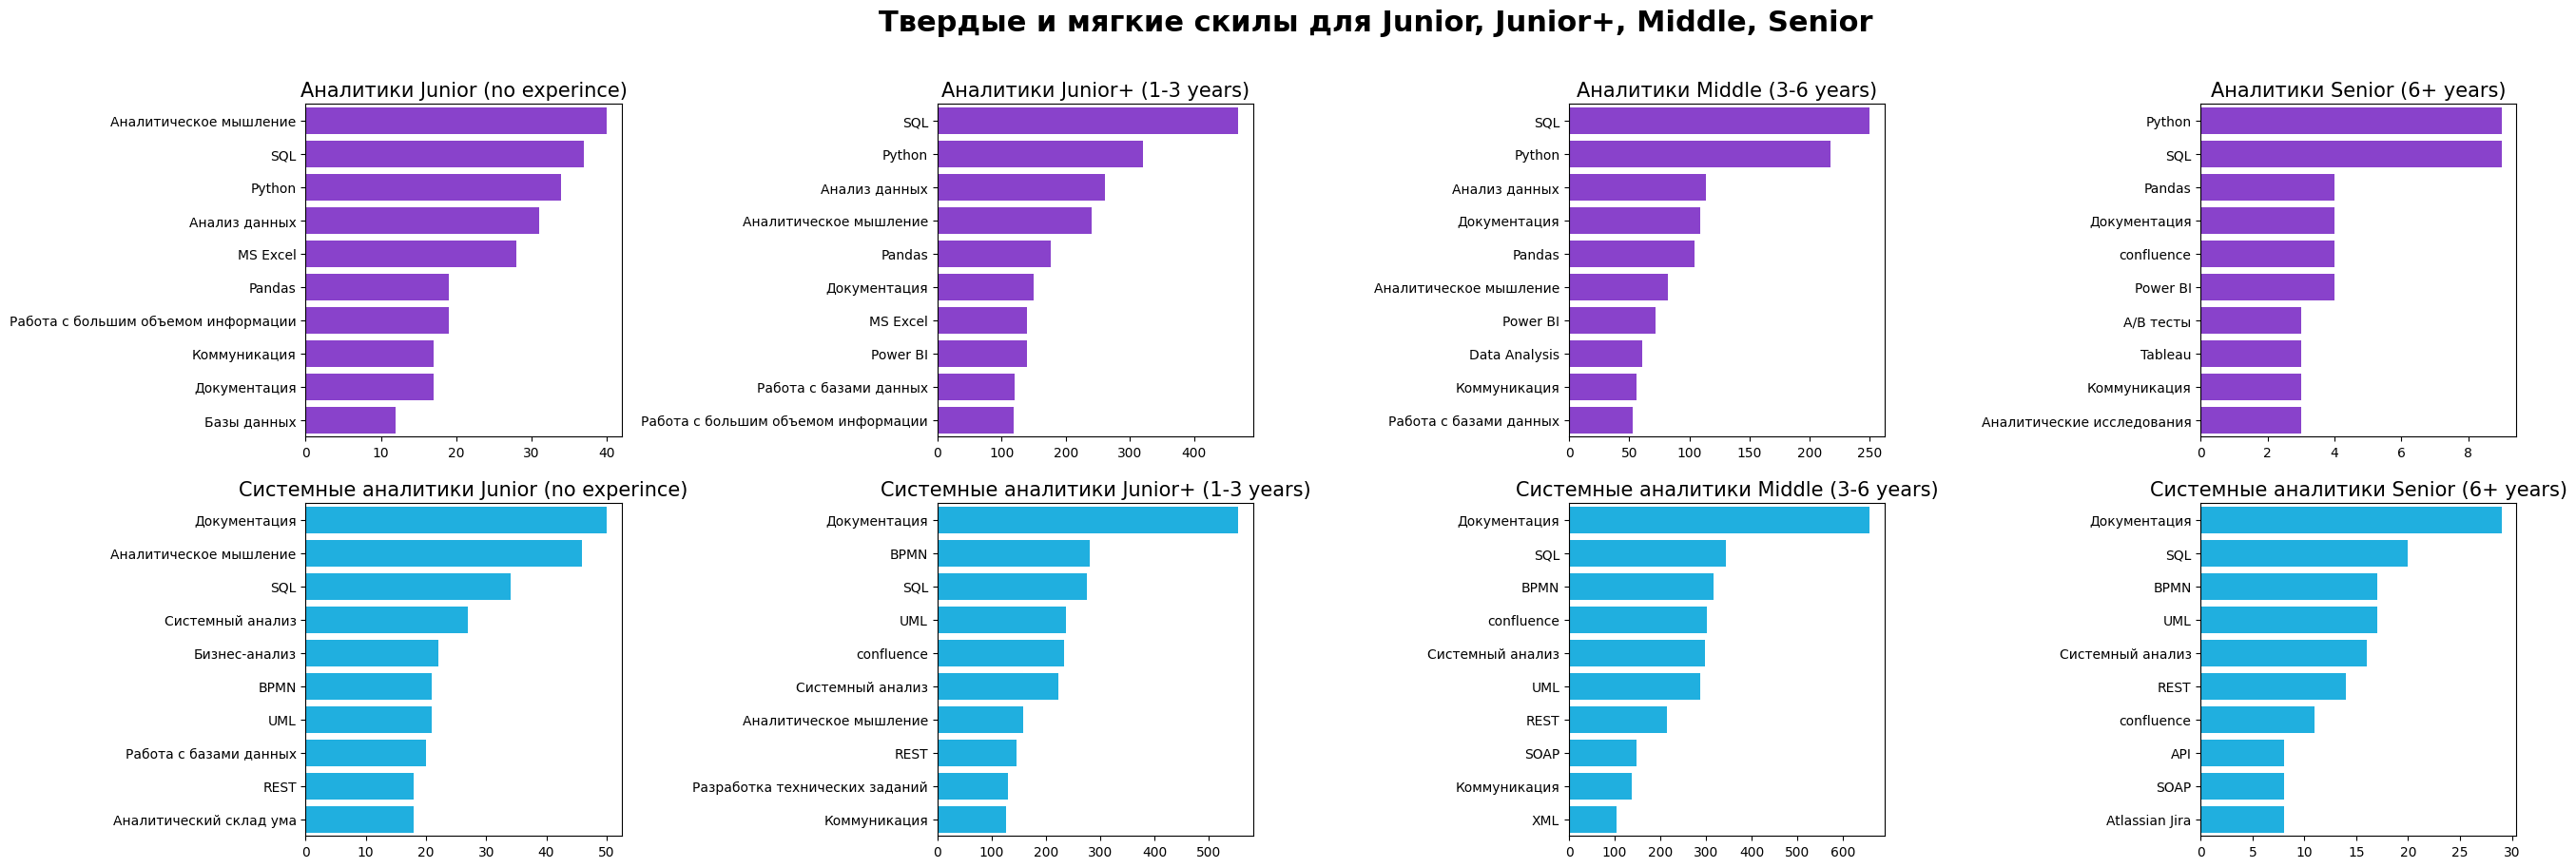

In [112]:
parameter_for_grade(df_all_skills, 'key_skills', 'Твердые и мягкие скилы')

Для обоих специальностей преимущественно спрашивают хард скилы. У специалистов Junior без опыта работы по сравнению с другими грейдами чаще спрашивают мягкий навык аналитического мышления.

In [ ]:
df_key_skills = all_vacancies[['id',
                         'vacancy_type',
                         'experience',
                         'key_skills'       
                         ]].reset_index(drop=True)

df_key_skills['key_skills']=df_key_skills['key_skills'].str.split(',').str.len()

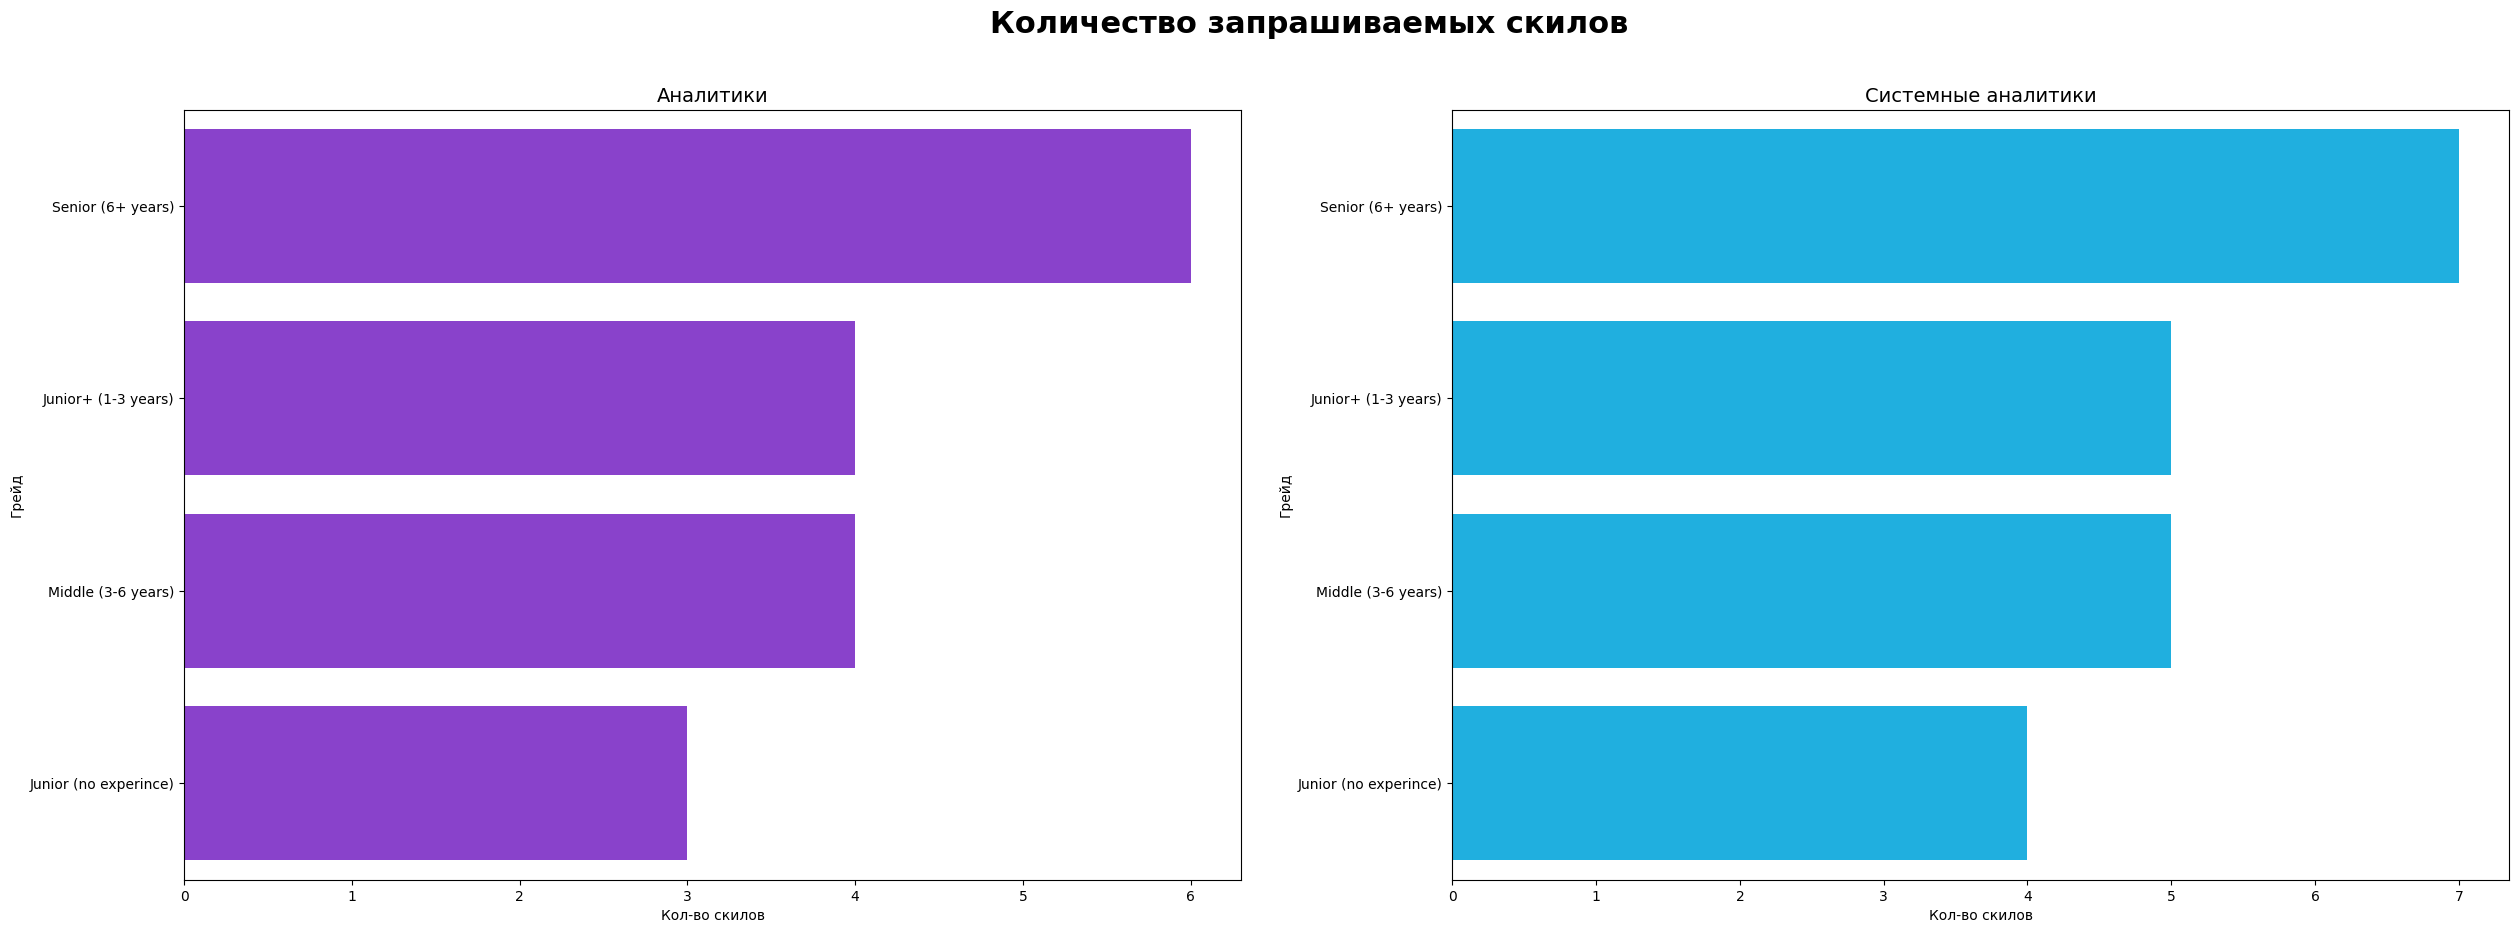

In [189]:
    fig, ax = plt.subplots(1, 2, figsize=(30, 10))
    plt.suptitle('Количество запрашиваемых скилов', fontsize=22, fontweight='bold')
    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']
    #for i, experience in enumerate(experience):
    da_1=df_key_skills.query("vacancy_type == 'da' and experience == @experience").groupby('experience', as_index = False)['key_skills'].median().sort_values(by='key_skills', ascending=False)
    sa_1=df_key_skills.query("vacancy_type == 'sa' and experience == @experience").groupby('experience', as_index = False)['key_skills'].median().sort_values(by='key_skills', ascending=False)
    # График для аналитиков данных
    sns.barplot(x='key_skills', y='experience', data=da_1,ax=ax[0], color='#8A2BE2')
    ax[0].set_title(f"Аналитики", fontsize=14)
    ax[0].set_xlabel('Кол-во скилов')
    ax[0].set_ylabel('Грейд')
    # График для Системных аналитиков
    sns.barplot(x='key_skills', y='experience', data=sa_1,ax=ax[1], color='#00BFFF')
    ax[1].set_title(f"Системные аналитики", fontsize=14)
    ax[1].set_xlabel('Кол-во скилов')
    ax[1].set_ylabel('Грейд')
    #plt.subplots_adjust(wspace = 0.5,hspace=0.5)
    plt.show()

Анализ количества запрашиваемых скилов по грейдам показал, что больше всего требований предъявляют к Системным аналитикам уровня Senior. Меньше всего - к Аналитикам данных уровня Junior без опыта работы.

### Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Системного аналитика отдельно для грейдов Junior, Junior+, Middle, Senior

In [113]:
df_hard_skills=prepare_data(all_vacancies,['id','vacancy_type','experience','hard_skills_from_description'],'hard_skills_from_description')

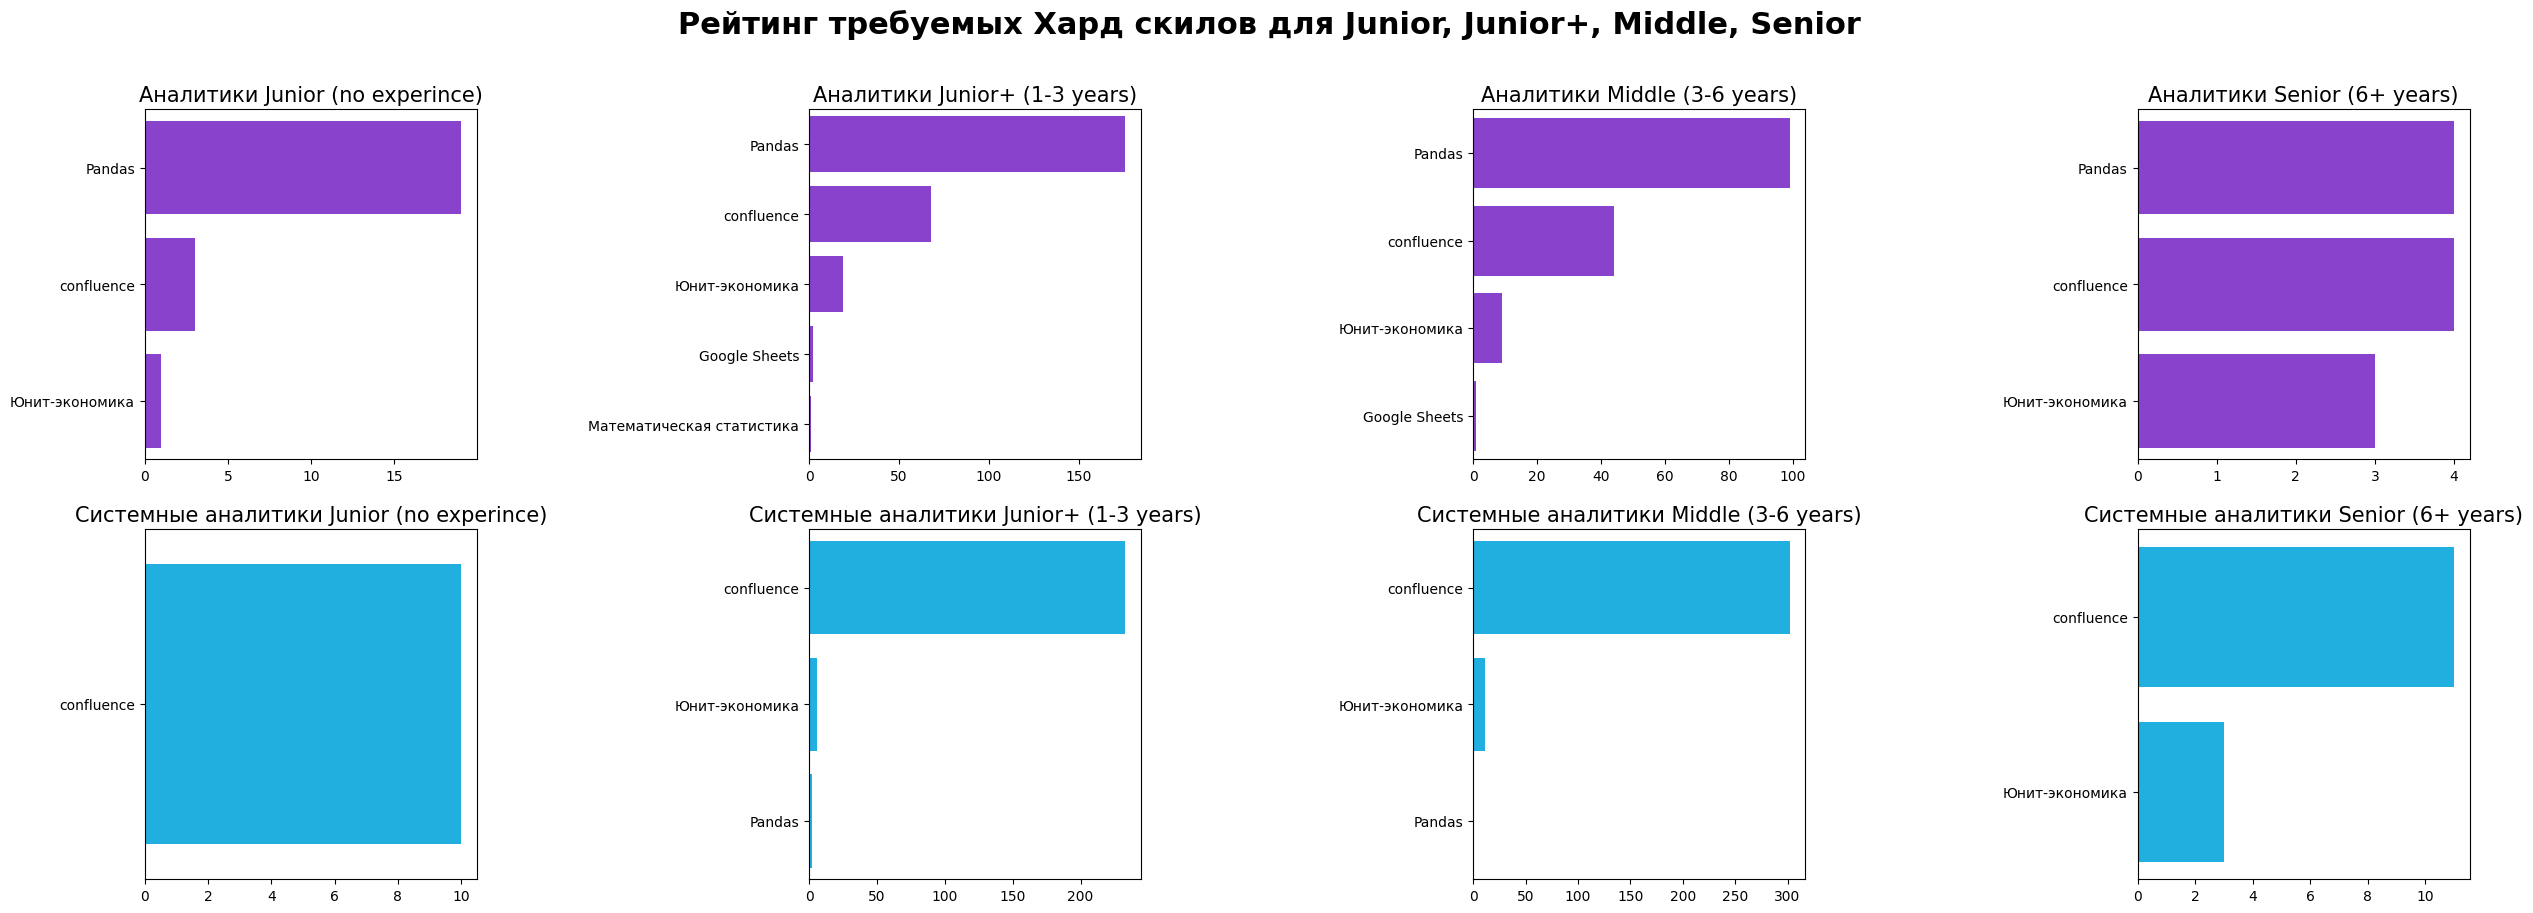

In [114]:
parameter_for_grade(df_hard_skills, 'hard_skills_from_description', 'Рейтинг требуемых Хард скилов')

Для Аналитиков данных основными хард скиллами в резюме явяются pandas, confluence и юнит-экономика. Для Системных аналитикво основными хард скиллами в резюме явяются confluence, юнит-экономика. 

In [115]:
df_soft_skills=prepare_data(all_vacancies,['id','vacancy_type','experience','soft_skills_from_description'],'soft_skills_from_description')

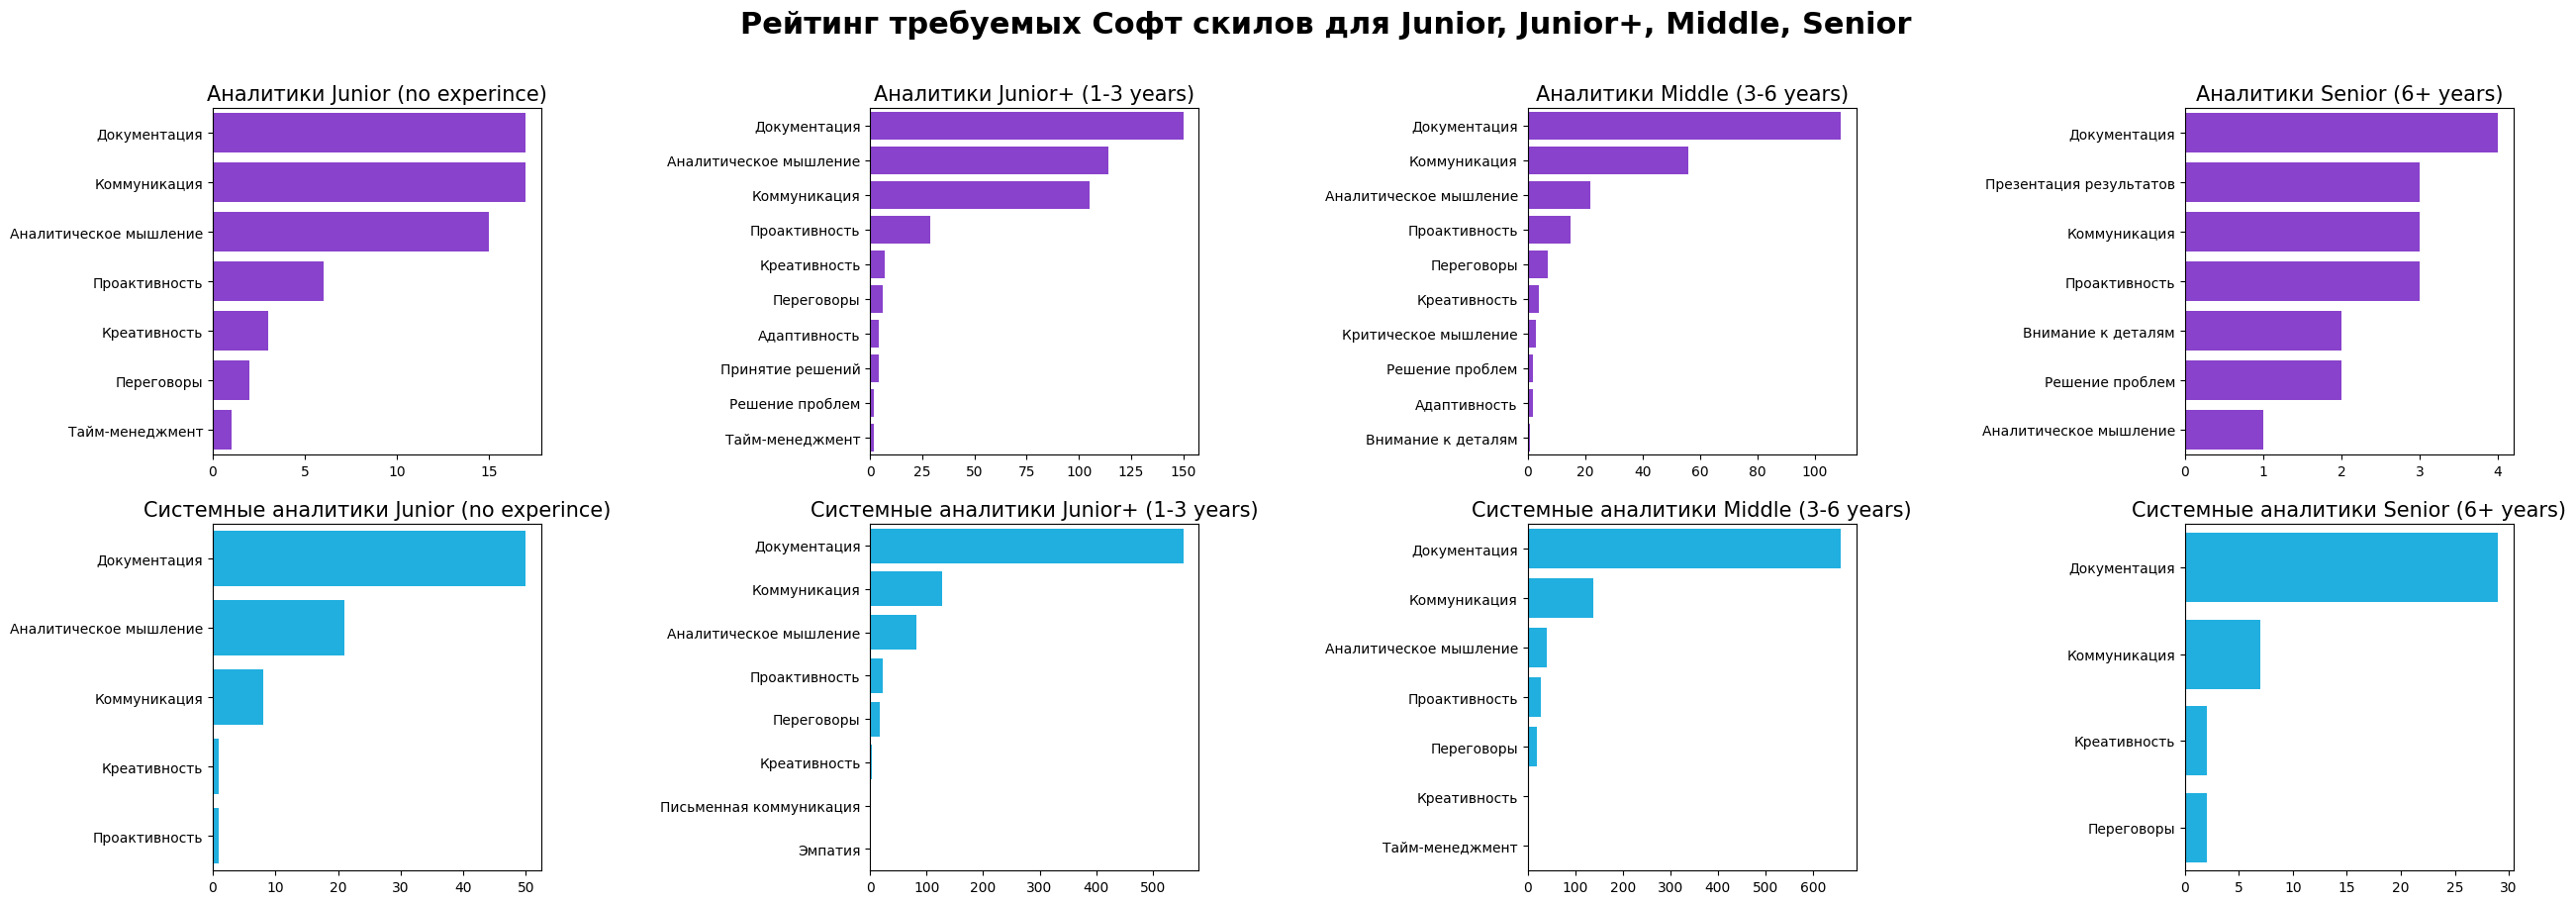

In [116]:
parameter_for_grade(df_soft_skills, 'soft_skills_from_description', 'Рейтинг требуемых Софт скилов')

Для Аналитиков данных и Систменых аналитиков ключевыми софт скиллами являются умение читать и писать документацию, аналитическое мышление и коммуникация.

### Общий вывод

Данные были получены из API HH.ru. Для удобства предобработки данных и запонения пропущенных значений объединим обе таблицы в один датасет.
<br>В таблице содержится 1574 уникальных названий вакансий.
<br> Топ-10 уникальных названий вакансий:
* Системный аналитик                     
* Аналитик данных                        
* Data Analyst                            
* Системный аналитик 1С                   
* Ведущий системный аналитик              
* Ведущий аналитик данных                 
* Системный аналитик DWH                  
* Data analyst                            
* Старший системный аналитик              
* Старший аналитик данных

<br> Топ-10 уникальных названий работодателей:
* СБЕР                                     
* Т1                                       
* Aston                                     
* WILDBERRIES                               
* ПСБ (ПАО «Промсвязьбанк»)                 
* Ozon                                      
* Совкомбанк Технологии                     
* МТС                                       
* Банк ВТБ (ПАО)                            
* МАГНИТ, Розничная сеть

<br> Топ-10 уникальных названий городав с вакансиями:
* Москва             
* Санкт-Петербург     
* Екатеринбург        
* Новосибирск          
* Казань               
* Нижний Новгород      
* Краснодар            
* Владивосток          
* Самара               
* Ростов-на-Дону                   

<b>Анализ доли распредления грейдов в вакансиях показал, что:</b>
* На должность Аналитика данных предпочитают нанимать специалистов уровня Junior+ с опытом от 1 до 3 лет (61%)
* На должность Системного аналитика предпочитают нанимать специалистов уровня Middle с опытом от 3 до 6 лет (49%)
* На должность Аналитика данных больше предложений для специалистов без опыта Junior (8% от вакансий), чем для Системного аналитика (таких вакансий всего 4%).
* Меньше всего вакансий для специалистов уровня Senior (более 6 лет опыта). Для Аналитика данных таких вакансий всего 1%, для Систменого аналитика - 2%.

<b>Топ-работодателей:</b>
<br>Среди вакансий для Аналитиков данных и Системных аналитиков лидирует Сбер.

Больше всего вакансий для Аналитиков данных предлагают компании:
* Для специалистов Junior без опыта работы - Сбер, Магнит, DNS.
* Для специалистов Junior + с опытом 1-3 года - Сбер, ВТБ, Озон.
* Для специалистов Middle с опытом 3-6 года - Сбер, Wildberries, Т1.
* Для специалистов Senior с опытом более 6 лет - Леруа Мерлен, Reinvent Baltics, Aramco Innovations.

Больше всего вакансий для Системных аналитиков предлагают компании:
* Для специалистов Junior без опыта работы - Aston, Компания Апогей, Twiga.
* Для специалистов Junior + с опытом 1-3 года - Сбер, Aston, Совком Технологии.
* Для специалистов Middle с опытом 3-6 года - Сбер, Wildberries, Т1.
* Для специалистов Senior с опытом более 6 лет - Т1, Сбер, Aston.

<b>Уровень зарплат:</b>
* Аналитикам данных и Системным аналитикам Junior без опыта работы, в основном, предлагают меньше 100 тыс.
* Аналитикам данных Junior+ с опытом 1- 3 года, в основном, предлагают от 100 до 200 тыс. и меньше 100 тыс.
* Системным аналитикам Junior+ с опытом 1- 3 года, в основном, предлагают от 100 до 200 тыс.
* Аналитикам данных уровня Middle, в основном, предлагают от 100 до 200 тыс.
* Системным аналитикам уровня Middle, в основном, предлагают от 200 до 300 тыс. и больше 300 тыс.
* Аналитикам данных уровня Senior, в основном, предлагают от 200 до 300 тыс.
* Системным аналитикам уровня Senior, в основном, предлагают больше 300 тыс.

<b>Тип занятости:</b>
Анализ типа занятости показывает, что специалистов всех грейдов работодатели предпочитают нанимать на полный день. Для специалистов без опыта работы также встречаются стажировки.

<b>График работы:</b>
* Анализ графика работы показывает, что, в основном, работодатели хотят нанимать специалистов на полный день. С увеличением опыта спеициалистов увеличивается количество предложений с удаленной работы. Предложения работы с гибким и сменным графиком представлены в минимальном количестве.   

<b>Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше:</b>
* Для обоих специальностей преимущественно спрашивают хард скилы. У специалистов Junior без опыта работы по сравнению с другими грейдами чаще спрашивают мягкий навык аналитического мышления.
* Анализ количества запрашиваемых скилов по грейдам показал, что больше всего требований предъявляют к Системным аналитикам уровня Senior. Меньше всего - к Аналитикам данных уровня Junior без опыта работы.

<b>Рейтинг требуемых hard skills:
* Для Аналитиков данных основными хард скиллами в резюме явяются pandas, confluence и юнит-экономика. Для Системных аналитикво основными хард скиллами в резюме явяются confluence, юнит-экономика. 

<b>Рейтинг требуемых soft skills:
* Для Аналитиков данных и Систменых аналитиков ключевыми софт скиллами являются умение читать и писать документацию, аналитическое мышление и коммуникация.

<b>Типичный портрет Аналитика данных такой:</b>
* Имеет опыт работы от 1 до 3 лет.
* Работает в Сбере.
* Зарабатывает от 100 до 200 тыс.
* Работает полный день в офисе.
* Владеет Python, SQL, Confluence, Юнит-экономикой.
* Умеет читать и писать документацию, обладает аналитическим мышлением и навыком коммуникации.

<b>Типичный портрет Системного аналитика такой:</b>
* Имеет опыт работы от 3 до 6 лет.
* Работает в Сбере.
* Зарабатывает от 200 до 300 тыс.
* Работает полный день в офисе.
* Владеет BPMN, SQL, Confluence.
* Умеет читать и писать документацию, обладает аналитическим мышлением и навыком коммуникации.

<b>Рекомендации:</b>

Для соискателей:
* Для Аналитиков данных: развивать hard skills (SQL, Python, Юнит-экономика). Для Системных аналитиков: развивать hard skills (BPMN, SQL, работа с документацией).
* Для обоих специальностей: развивать soft skills(аналитическое мышление, умение коммуницировать).

Для работодателей:
* Ввиду высокой конкуренции за специалистов уровня Junior+ и Middle предлагать более выгодные условия в виде уровня заработной платы, ДМС, возможности карьерного роста, обучения за счет компании.
* Предлагать гибридный или удаленный формат работы, чтобы привлечь больше кандидатов. 
